In [1]:
import imageio
import matplotlib.pyplot as plt
import torch
print(torch.cuda.is_available())
import sys
sys.path.append("./GLIP/")

from meshseg.models.GLIP.glip import GLIPModel
GM = GLIPModel()

True


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nkhalil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\nkhalil\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
c:\ProgramData\miniforge3\envs\meshseg\lib\site-packages\torch\functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ..\aten\src\ATen\native\TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


VISION BACKBONE USE GRADIENT CHECKPOINTING:  False
LANGUAGE BACKBONE USE GRADIENT CHECKPOINTING:  False
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B


In [2]:
si = 128
# img = torch.zeros((si, si, 3), dtype=torch.uint8).numpy()
img = imageio.imread("data/img/table.jpg")
# img += 2
# plt.imshow(img)
print(img.shape)
# prediction = GM.predict(img, "The legs, head, eyes, arms of people")
# prediction = GM.predict(img, "the legs, top of the table")
prediction = GM.predict(img, "legs, wood")

C:\Users\nkhalil\AppData\Local\Temp\ipykernel_3612\511890018.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread("data/img/table.jpg")


(349, 474, 3)


c:\ProgramData\miniforge3\envs\meshseg\lib\site-packages\transformers\modeling_utils.py:977: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
c:\ProgramData\miniforge3\envs\meshseg\lib\site-packages\torch\nn\functional.py:3847: UserWarning: nn.functional.upsample_bilinear is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample_bilinear is deprecated. Use nn.functional.interpolate instead.")


inference time per image: 4.758654299999996


BoxList(num_boxes=5, image_width=474, image_height=349, mode=xyxy)


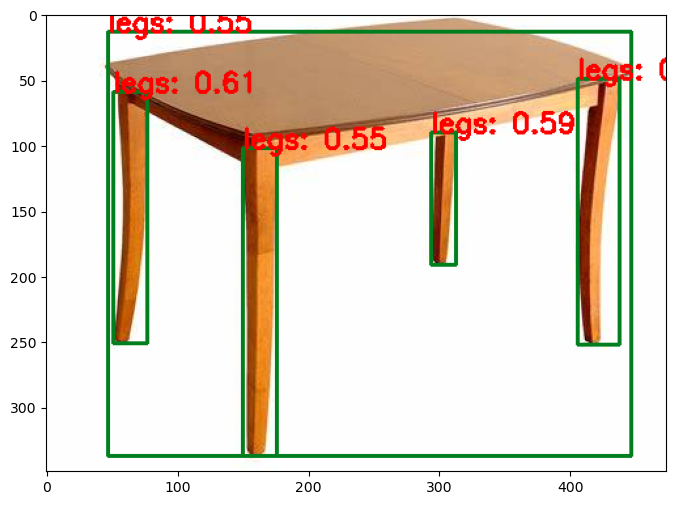

In [3]:
print(prediction[1])
# plt.figure(figsize=[15, 10])
plt.figure(figsize=[8, 6])
plt.imshow(prediction[0])
plt.show()

In [12]:
print(prediction[1].get_field("scores")[0])

tensor(0.6135)


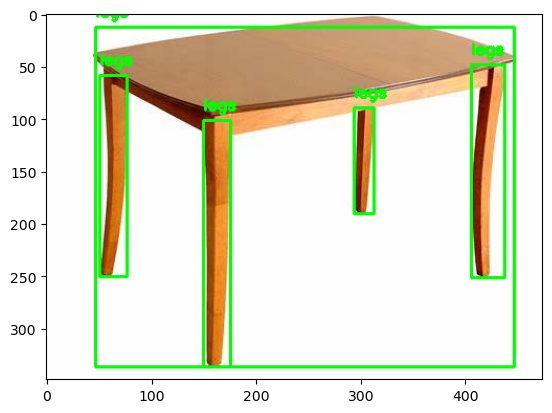

In [5]:
import cv2
for i in range(len(prediction[1].bbox)):
    startX = int(prediction[1].bbox[i][0].item())
    startY = int(prediction[1].bbox[i][1].item())
    endX = int(prediction[1].bbox[i][2].item())
    endY = int(prediction[1].bbox[i][3].item())
    cv2.rectangle(img, (startX, startY), (endX, endY), (0, 255, 0), 2)
    cv2.putText(img, 'legs', (startX, startY - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
plt.imshow(img)
plt.show()